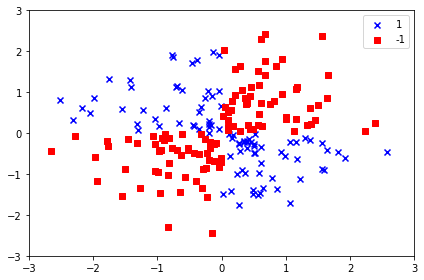

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# np.random.seed(1)

X_xor = np.random.randn(200,2)

X1 = X_xor[:, 0] > 0
# print(X1)

X2 = X_xor[:, 1] > 0
# print(X2)
Y_xor = np.logical_xor(X1, X2)

Y_xor = np.where(Y_xor, 1, -1)

# print(Y_xor)

plt.scatter(X_xor[Y_xor == 1, 0],
            X_xor[Y_xor == 1, 1],
           c='b', marker='x',
           label='1')


plt.scatter(X_xor[Y_xor == -1, 0],
           X_xor[Y_xor == -1, 1],
           c='r', marker='s',
           label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [30]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, Y_xor)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [34]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')

    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    X1_min, X1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    X2_min, X2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(X1_min, X1_max, resolution),
                              np.arange(X2_min, X2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0],
                   y=X[y == cl, 1],
                   alpha=0.8,
                   c=colors[idx],
                   marker=markers[idx],
                   label=cl,
                   edgecolor='black')
    if test_idx:
        X_test, Y_test = X[test_idx, :], Y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='', edgecolor='black', alpha=1.0,
                   linewidth=1, marker='o',
                   s=100, label='test set')

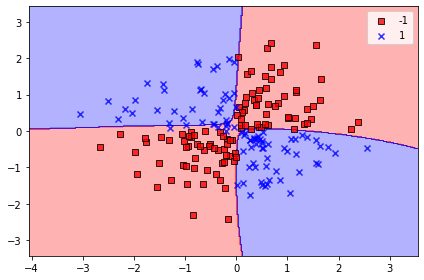

In [35]:
plot_decision_regions(X_xor, Y_xor, classifier=svm)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [36]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
Y = iris.target

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=1, stratify=Y)


X_train_01_subset = X_train[(Y_train == 0) | (Y_train == 1)]
y_train_01_subset = Y_train[(Y_train == 0) | (Y_train == 1)]


sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test) # 테스트 셋도 훈련셋에 맞춰서 동일하게 표준화하도록 한것


X_combined_std = np.vstack((X_train_std, X_test_std))
Y_combined = np.hstack((Y_train, Y_test))

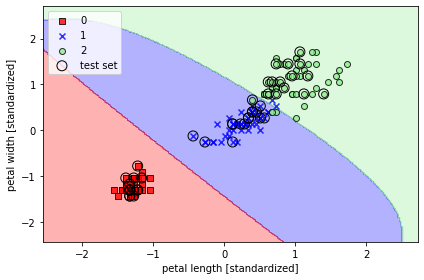

In [37]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)

svm.fit(X_train_std, Y_train)
plot_decision_regions(X_combined_std, Y_combined, classifier=svm, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

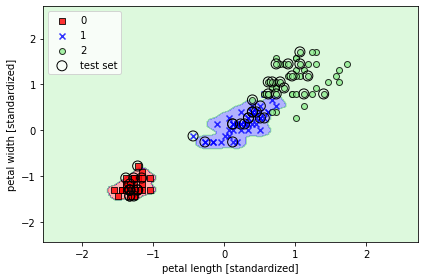

In [38]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)

svm.fit(X_train_std, Y_train)
plot_decision_regions(X_combined_std, Y_combined, classifier=svm, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()